<a href="https://colab.research.google.com/github/RohanRanshinge/causal-inference/blob/main/zero-to-hero-bsts/PART_I-Bayesian-Statistics/04.1-Beta-%26-Normal-Distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Beta Distribution
Earlier we saw that binomial distribution is used to find the probability of successful outcomes, given a number of trials and the probability of the successful outcome.

In Beta distribution, we want to find the probability of success given we have observed the number of successful outcomes for a given number of trials.

For example we would use beta distribution to find the probability of flipping heads when we have observed 50 tosses of a coin and 30 of those were heads.

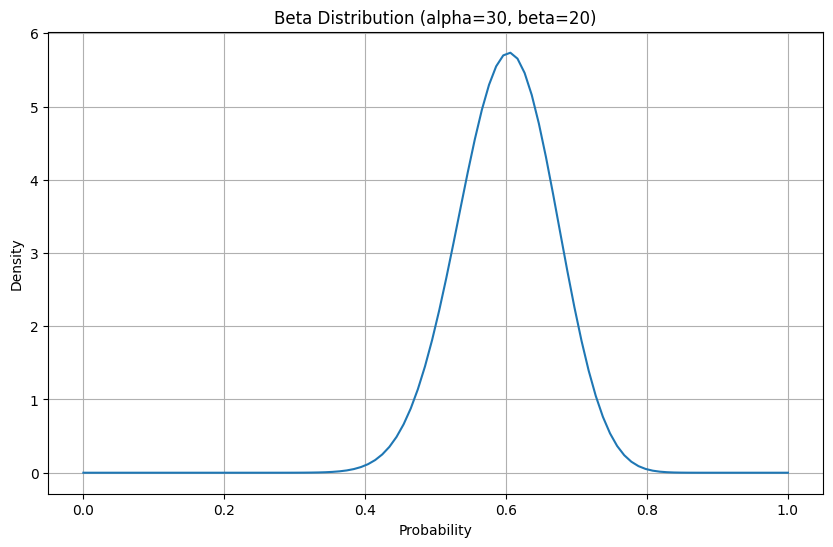

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta

# Parameters for the Beta distribution
alpha = 30
beta_param = 20 # Renamed to avoid conflict with the beta function

# Generate x-values (probabilities)
x = np.linspace(0, 1, 100) # Beta distribution is defined for x between 0 and 1

# Calculate the probability density function (PDF) for each x-value
pdf_values = beta.pdf(x, alpha, beta_param)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, pdf_values)

# Add labels and title
plt.xlabel("Probability")
plt.ylabel("Density")
plt.title(f"Beta Distribution (alpha={alpha}, beta={beta_param})")
plt.grid(True)

# Display the plot
plt.show()

* Beta distribution is different from binomial distribution as in binomial distribution we are looking at the distribution of k, the number of outcomes we care about, which is always something we can count.  
* For beta distribution, we are looking at the distribution of p, for which we have an infinite number of possible values.
* The x axis of a beta distribution ranges from 0 to 1
* The y axis is the probability density and can be thought of as the weight of each hypothesis.

It's given by:
$$Beta(p;α,β) = \frac{p^{α-1}(1-p)^{β-1}}{beta(α,β)} $$
* p = probability of an event. This is our different hypothesis for the possible probabilities
* α = how many times we observe an event we care about
* β = how many times we observe the event we care about didn't happen

The mean of a beta distribution is given by  
$ μ =  \frac{α}{(α + β)}$  
$σ = \frac{(α*β)}{(α+β)^2*(α+β+1)}$


If you have a sense of the average probability and the variance you can plug it into the equations above to get alpha and beta values.

If you know the mean and variance of a beta distribution you can also use bigger or smaller values of alpha and beta to get different distributions based on your understanding of data (ie prior beliefs). If you are uncertain you can choose small values, if you have stronger beliefs you can choose larger values and still keep the mean and variance same.

This flexibility allows you to incorporate your existing knowledge or lack thereof into the model.



### What does this look like?

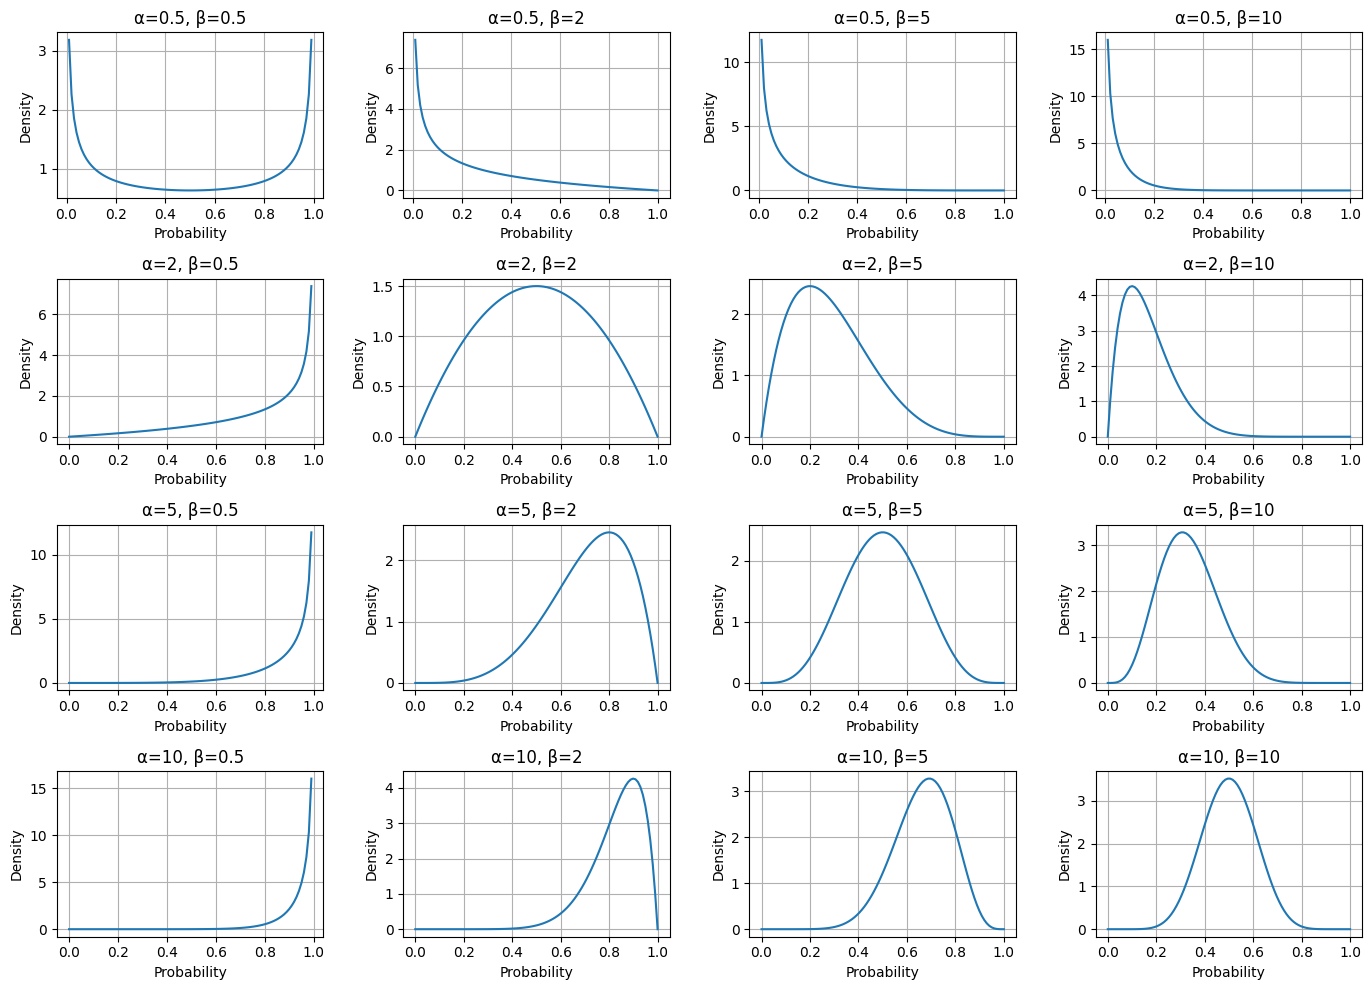

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta

# Define a range of alpha and beta values to explore
alpha_values = [0.5,  2, 5, 10]
beta_values = [0.5, 2, 5, 10]

# Create a grid of subplots
fig, axes = plt.subplots(len(alpha_values), len(beta_values), figsize=(14, 10))

# Generate x-values (probabilities)
x = np.linspace(0, 1, 100)

# Iterate through the alpha and beta values and plot each distribution
for i, alpha in enumerate(alpha_values):
    for j, beta_param in enumerate(beta_values):
        # Calculate the probability density function (PDF)
        pdf_values = beta.pdf(x, alpha, beta_param)

        # Plot the distribution
        axes[i, j].plot(x, pdf_values)

        # Add titles and labels
        axes[i, j].set_title(f"α={alpha}, β={beta_param}")
        axes[i, j].set_xlabel("Probability")
        axes[i, j].set_ylabel("Density")
        axes[i, j].grid(True)

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Display the plot
plt.show()

In real life situations, we almost never know the true probabilities for events.

**That’s why the beta distribution is one of the most powerful tools for understanding data.**


### How would you do this in python?
Let’s say you are flipping a coin and notice that you get 12 heads and 18 tails and want to know the probability that the chance of getting heads is less than or equal to 0.5


In [ ]:
import scipy.stats as stats
alpha = 12
beta = 18
threshold = 0.5
probability = stats.beta.cdf(threshold, alpha, beta)
print(probability)

0.867534551769495


OR you can also write this as

In [ ]:
from scipy.integrate import quad
from scipy.stats import beta
# Define the function to integrate
def integrand(p):
 return beta.pdf(p, 12, 18)
# Perform the integration
result, error = quad(integrand, 0, 0.5)
result

0.8675345517694951

If you had to find the probability that the chance of getting heads was greater than 0.5 you would change the above code blocks like so


In [ ]:
import scipy.stats as stats
alpha = 12
beta = 18
threshold = 0.5
probability = 1- stats.beta.cdf(threshold, alpha, beta)
print(probability)


0.132465448230505


In [ ]:
from scipy.integrate import quad
from scipy.stats import beta
# Define the function to integrate
def integrand(p):
 return beta.pdf(p, 12, 18)
# Perform the integration
result, error = quad(integrand, 0.5, 1)
result


0.13246544823050507

## Normal Distribution
A normal distribution is a continuous probability distribution that is shaped like a bell curve


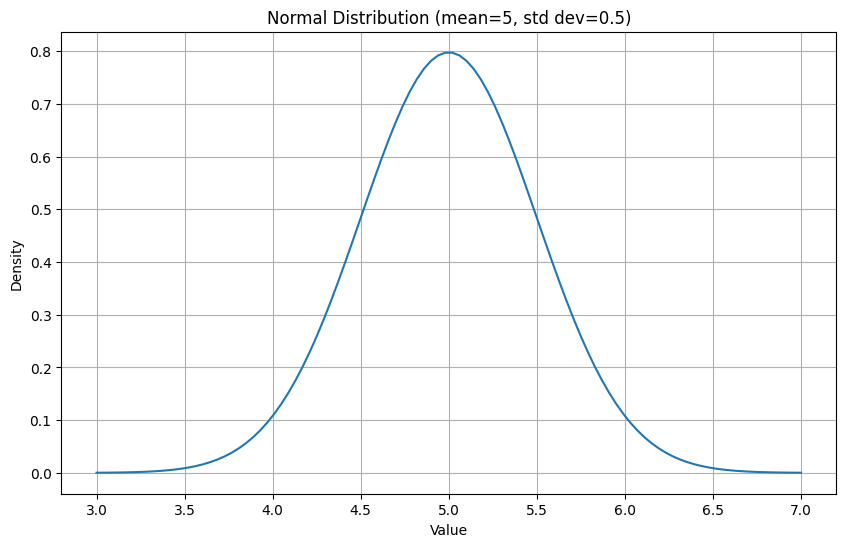

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Parameters for the Normal distribution
mean = 5
std_dev = 0.5

# Generate x-values
x = np.linspace(mean - 4 * std_dev, mean + 4 * std_dev, 100) # Generate x-values around the mean

# Calculate the probability density function (PDF) for each x-value
pdf_values = norm.pdf(x, mean, std_dev)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, pdf_values)

# Add labels and title
plt.xlabel("Value")
plt.ylabel("Density")
plt.title(f"Normal Distribution (mean={mean}, std dev={std_dev})")
plt.grid(True)

# Display the plot
plt.show()


*  The peak of the distribution is centered around the mean. The spread of the distribution is controlled by the standard deviation
*  The distribution is shown with a smooth curve instead of discrete bars.

The area under the curve always equals 1  
The y axis is labeled density because the normal pdf returns a probability density instead of an actual probability

The Probability Density Function (PDF) for a normal distribution is given by:
$$f(x \mid \mu, \sigma) = \frac{1}{\sqrt{2\pi}\,\sigma} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)$$

Where:

* x is the random variable
* μ (mu) is the mean of the distribution
* σ (sigma) is the standard deviation of the distribution
* π (pi) ≈ 3.14159
* e is Euler's number ≈ 2.71828

To find the actual probability of a value lying between x1 and x2 we need to integrate the function for these limits.

Normal distributions have a great feature where 68% of the data lies within 1std from the mean, 95% of the data lies between 2std and 99% of the data lies between 3std.
